In [5]:
%cd ..

d:\github\ripple_heterogeneity\python


In [7]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import hdf5storage
import h5py

import functions

In [12]:
# read cell_metrics.cellinfo
session = 'A:/Data/Kenji/ec013.540_561/ec013.540_561.cell_metrics.cellinfo.mat'
# f = h5py.File(session)
data = hdf5storage.loadmat(session)


# read SWRunitMetrics
# read xml
# read ripples.events

In [13]:
data

 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 ,
                                 -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,
                                  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
                                  0.55,  0.6 ,  0.65,  0.7 ,  0.75]])                          ,
                         array([[-0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 ,
                                 -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,
                                  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
                                  0.55,  0.6 ,  0.65,  0.7 ,  0.75]])                          ,
                         array([[-0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 ,
                                 -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,
                                  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35, 

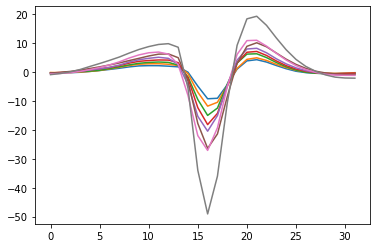

In [36]:
waveforms = data['cell_metrics']['waveforms'][0][0][0][0][0][0][0]
plt.plot(waveforms.T)
plt.show()

In [47]:
data['cell_metrics'].dtype

dtype([('UID', 'O'), ('ab_ratio', 'O'), ('acg', 'O'), ('acg_asymptote', 'O'), ('acg_c', 'O'), ('acg_d', 'O'), ('acg_fit_rsquare', 'O'), ('acg_h', 'O'), ('acg_refrac', 'O'), ('acg_tau_burst', 'O'), ('acg_tau_decay', 'O'), ('acg_tau_rise', 'O'), ('animal', 'O'), ('brainRegion', 'O'), ('burstIndex_Doublets', 'O'), ('burstIndex_Mizuseki2012', 'O'), ('burstIndex_Royer2012', 'O'), ('cellID', 'O'), ('cluID', 'O'), ('cluster_index', 'O'), ('cv2', 'O'), ('deepSuperficial', 'O'), ('deepSuperficialDistance', 'O'), ('electrodeGroup', 'O'), ('events', 'O'), ('firingRate', 'O'), ('firingRateCV', 'O'), ('firingRateGiniCoeff', 'O'), ('firingRateISI', 'O'), ('firingRateInstability', 'O'), ('general', 'O'), ('isi', 'O'), ('labels', 'O'), ('maxWaveformCh', 'O'), ('maxWaveformCh1', 'O'), ('maxWaveformChannelOrder', 'O'), ('peakVoltage', 'O'), ('peakVoltage_expFit', 'O'), ('polarity', 'O'), ('population_modIndex', 'O'), ('putativeCellType', 'O'), ('putativeConnections', 'O'), ('refractoryPeriodViolation', 

In [53]:
data['cell_metrics'][0][0][0][0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88], dtype=uint8)

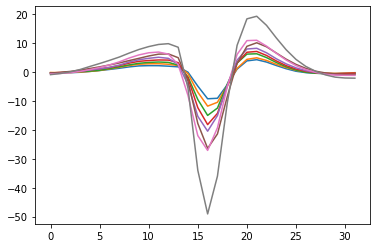

In [64]:
import scipy.io as sio

 
data = sio.loadmat(session)
# my_struct['cell_metrics']

waveforms = data['cell_metrics']['waveforms'][0][0][0][0][0][0][0]
plt.plot(waveforms.T)
plt.show()

In [214]:
def load_cell_metrics(filename):
"""
loader of cell-explorer cell_metrics.cellinfo.mat

Inputs: filename: path to cell_metrics.cellinfo.mat
outputs: df: data frame of single unit features
data_: dict with data that does not fit nicely into a dataframe (waveforms, acgs, etc.)

- Ryan H
"""
    def extract_epochs(data):
        startTime = [ep['startTime'][0][0][0][0] for ep in data['cell_metrics']['general'][0][0]['epochs'][0][0][0]]
        stopTime = [ep['stopTime'][0][0][0][0] for ep in data['cell_metrics']['general'][0][0]['epochs'][0][0][0]]
        name = [ep['name'][0][0][0] for ep in data['cell_metrics']['general'][0][0]['epochs'][0][0][0]]

        epochs = pd.DataFrame()
        epochs['name'] = name
        epochs['startTime'] = startTime
        epochs['stopTime'] = stopTime
        return epochs

    def extract_general(data):
        ripple_fr = [ev.T[0] for ev in data['cell_metrics']['events'][0][0]['ripples'][0][0][0]]
        epochs = extract_epochs(data)
        data_ = {
            "acg_wide": data['cell_metrics']['acg'][0][0]['wide'][0][0],
            "acg_narrow": data['cell_metrics']['acg'][0][0]['narrow'][0][0],
            "acg_log10": data['cell_metrics']['acg'][0][0]['log10'][0][0],
            "ripple_fr": ripple_fr,
            "basename": data['cell_metrics']['general'][0][0]['basename'][0][0][0],
            "basepath": data['cell_metrics']['general'][0][0]['basepath'][0][0][0],
            "cellCount": data['cell_metrics']['general'][0][0]['cellCount'][0][0][0][0],
            "chanCoords_x": data['cell_metrics']['general'][0][0]['chanCoords'][0][0][0][0]['x'].T[0],
            "chanCoords_y": data['cell_metrics']['general'][0][0]['chanCoords'][0][0][0][0]['y'].T[0],
            "sex": data['cell_metrics']['general'][0][0]['animal'][0][0]['sex'][0][0][0],
            "species": data['cell_metrics']['general'][0][0]['animal'][0][0]['species'][0][0][0],
            "strain": data['cell_metrics']['general'][0][0]['animal'][0][0]['strain'][0][0][0],
            "geneticLine": data['cell_metrics']['general'][0][0]['animal'][0][0]['geneticLine'][0][0][0],
            "epochs": epochs
            }
        return data_ 

    # load cell_metrics file
    data = sio.loadmat(filename)
    dt = data['cell_metrics'].dtype

    # construct data frame with features per neuron
    df = pd.DataFrame()
    for dn in dt.names:
        try:
            df[dn] = data['cell_metrics'][dn][0][0][0]
        except:
            continue

    # extract general data and put into dict    
    data_ = extract_general(data)

    return df,data_
filename = 'A:/Data/Kenji/ec013.540_561/ec013.540_561.cell_metrics.cellinfo.mat'
df,data_ = load_cell_metrics(filename)
display(df)
print(df.keys())
print(data_.keys())

,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,acg_tau_decay,...,spikeCount,synapticConnectionsIn,synapticConnectionsOut,synapticEffect,thetaModulationIndex,total,trilat_x,trilat_y,troughToPeak,troughtoPeakDerivative
0,1,0.332710,0.601433,14.408824,2.540505,0.259941,22.853461,9.984846,4.074157,5.190860,...,7648,2,0,[Unknown],0.053344,7648,18.774731,-34.363568,0.23,0.15
1,2,0.269982,7.340904,8.113168,4.658616,0.873546,23.689211,3.013510,1.608141,19.391276,...,19179,1,0,[Unknown],0.029000,19179,19.620513,-28.168134,0.27,0.17
2,3,-0.310621,-3.664141,17.082819,1.496071,0.886190,27.043742,5.092623,1.927423,107.494177,...,36645,0,1,[Excitatory],-0.005684,36645,19.895751,-34.947582,0.46,0.19
3,4,-0.248032,3.026403,6.292553,2.999373,0.723261,16.945979,5.593262,1.485837,19.434022,...,11668,0,0,[Unknown],-0.028118,11668,6.896892,-22.719008,0.44,0.20
4,5,-0.278485,4.534593,14.184590,1.612977,0.736797,7.777361,2.671208,0.954870,4.112831,...,18663,0,2,[Excitatory],-0.024235,18663,19.806412,-34.185602,0.49,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,-0.574507,5.785264,31.481861,0.982193,0.985965,38.239721,4.923442,0.711053,11.999903,...,33285,0,2,[Excitatory],0.201328,33285,1208.492465,-26.521827,0.47,0.17
84,85,-0.483907,10.490165,38.386219,1.485680,0.991169,74.738884,5.299795,0.834929,12.511409,...,24130,0,1,[Excitatory],0.350220,24130,1208.492465,-26.521827,0.41,0.17
85,86,-0.086663,-9.857072,71.765885,1.314473,0.989626,24.938594,2.755630,2.545685,46.339422,...,202762,6,0,[Unknown],0.414968,202762,1208.492465,-26.521827,0.37,0.20
86,87,-0.484560,5.122345,33.179677,1.436287,0.968108,55.973881,6.346237,0.862577,10.493526,...,13459,0,0,[Unknown],-0.020239,13459,1208.492465,-26.521827,0.39,0.18


Index(['UID', 'ab_ratio', 'acg_asymptote', 'acg_c', 'acg_d', 'acg_fit_rsquare',
       'acg_h', 'acg_refrac', 'acg_tau_burst', 'acg_tau_decay', 'acg_tau_rise',
       'animal', 'brainRegion', 'burstIndex_Doublets',
       'burstIndex_Mizuseki2012', 'burstIndex_Royer2012', 'cellID', 'cluID',
       'cluster_index', 'cv2', 'deepSuperficial', 'deepSuperficialDistance',
       'electrodeGroup', 'firingRate', 'firingRateCV', 'firingRateGiniCoeff',
       'firingRateISI', 'firingRateInstability', 'labels', 'maxWaveformCh',
       'maxWaveformCh1', 'maxWaveformChannelOrder', 'peakVoltage',
       'peakVoltage_expFit', 'polarity', 'population_modIndex',
       'putativeCellType', 'refractoryPeriodViolation',
       'ripples_modulationIndex', 'ripples_modulationPeakResponseTime',
       'ripples_modulationSignificanceLevel', 'sessionName', 'shankID',
       'spikeCount', 'synapticConnectionsIn', 'synapticConnectionsOut',
       'synapticEffect', 'thetaModulationIndex', 'total', 'trilat_x',
    

In [215]:
df.putativeCellType

0     [Narrow Interneuron]
1     [Narrow Interneuron]
2         [Pyramidal Cell]
3         [Pyramidal Cell]
4         [Pyramidal Cell]
              ...         
83        [Pyramidal Cell]
84    [Narrow Interneuron]
85    [Narrow Interneuron]
86    [Narrow Interneuron]
87    [Narrow Interneuron]
Name: putativeCellType, Length: 88, dtype: object

In [210]:

putativeCellType = [cell[0] for cell in data['cell_metrics'][0][0]['putativeCellType'][0]]
putativeCellType

['Narrow Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'Wide Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Wide Interneuron',
 'Wide Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Wide Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Narrow Interneuron',
 'Pyramidal Cell',
 'Pyramidal Cell',
 'P

dict_keys(['acg_wide', 'acg_narrow', 'acg_log10', 'ripple_fr', 'basename', 'basepath', 'cellCount', 'chanCoords'])


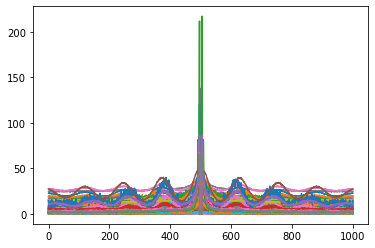

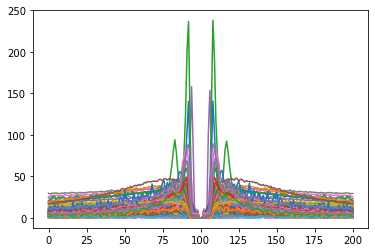

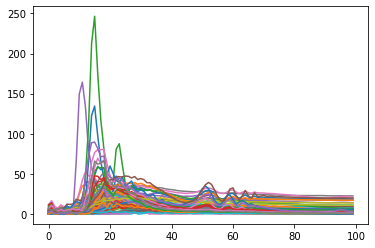

In [180]:
ripple_fr = [ev.T[0] for ev in data['cell_metrics']['events'][0][0]['ripples'][0][0][0]]
data_ = {
    "acg_wide": data['cell_metrics']['acg'][0][0]['wide'][0][0],
    "acg_narrow": data['cell_metrics']['acg'][0][0]['narrow'][0][0],
    "acg_log10": data['cell_metrics']['acg'][0][0]['log10'][0][0],
    "ripple_fr": ripple_fr,
    "basename": data['cell_metrics']['general'][0][0]['basename'][0][0][0],
    "basepath": data['cell_metrics']['general'][0][0]['basepath'][0][0][0],
    "cellCount": data['cell_metrics']['general'][0][0]['cellCount'][0][0][0][0],
    "chanCoords_x": data['cell_metrics']['general'][0][0]['chanCoords'][0][0][0][0]['x'].T[0],
    "chanCoords_y": data['cell_metrics']['general'][0][0]['chanCoords'][0][0][0][0]['y'].T[0],
    "sex": data['cell_metrics']['general'][0][0]['animal'][0][0]['sex'][0][0][0],
    "species": data['cell_metrics']['general'][0][0]['animal'][0][0]['species'][0][0][0],
    "strain": data['cell_metrics']['general'][0][0]['animal'][0][0]['strain'][0][0][0],
    "geneticLine": data['cell_metrics']['general'][0][0]['animal'][0][0]['geneticLine'][0][0][0],
    }

print(data_.keys())
# putativeConnections : not compatible
# responseCurves : not compatible
# spikes : not compatible
# waveforms : not compatible

plt.plot(data['cell_metrics']['acg'][0][0]['wide'][0][0])
plt.show()
plt.plot(data['cell_metrics']['acg'][0][0]['narrow'][0][0])
plt.show()
plt.plot(data['cell_metrics']['acg'][0][0]['log10'][0][0])
plt.show()